## Data pre-processing

### Import

In [2]:
#import dataset and libraries
import pandas as pd
labels = ["SpMax_L","J_Dz(e)","nHM","F01[N-N]","F04[C-N]","NssssC","nCb-","C%","nCp","nO","F03[C-N]","SdssC","HyWi_B(m)","LOC","SM6_L","F03[C-O]","Me","Mi"
          ,"nN-N","nArNO2","nCRX3","SpPosA_B(p)","nCIR","B01[C-Br]","B03[C-Cl]","N-073","SpMax_A","Psi_i_1d","B04[C-Br]","SdO"
          ,"TI2_L","nCrt","C-026","F02[C-N]","nHDon","SpMax_B(m)","Psi_i_A","nN","SM6_B(m)","nArCOOR","nX","class"]
df = pd.read_csv(r"C:\Users\hapim\OneDrive\Bureau\ESILV A4\Python for data analysis\projet\qsar+biodegradation\biodeg.csv",sep=";",names=labels)
df

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


### Cleaning

In [6]:
#look for types of values contains in the dataset
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [20]:
#look for null data
#method 1
nanval=df.isna().any(axis=1)
df[nanval]
#method 2
df.isnull().sum().sum()
#No missing value in the dataset

0

In the context of specific classification models like logistic regression, it is a requirement that target classes be expressed as integers. Here, the positive class denoting degradability ("RB") will be encoded as 1, whereas the negative class indicating non-degradability will be represented as 0.

In [9]:
#encoding the last columns which represents experimental class, with ready biodegradable (RB) and not ready biodegradable (NRB)
df.replace(["RB","NRB"],[1,0], inplace = True) 
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1


In [11]:
#exploring the dataset
df.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [15]:
#we need the mean and the std to normalize the dataset 
mean=df.mean()
std=df.std()

In [19]:
#normalization od df
normdf=(df-mean)/std
normdf 

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
0,-1.579116,-0.455436,-0.489991,-0.166611,-0.420109,-0.270120,-0.740035,-0.618477,0.317642,-1.015972,...,-0.581014,-0.560635,-0.764620,-0.969625,-1.505087,-0.629368,-1.108299,-0.160469,-0.322970,1.400579
1,-1.120179,-1.148921,-0.489991,-0.166611,-0.420109,-0.270120,-0.740035,-0.684090,-0.191647,-0.452729,...,-0.581014,-0.560635,-0.764620,-0.603480,-0.920114,-0.629368,-1.105078,-0.160469,-0.322970,1.400579
2,-1.555346,0.218562,-0.489991,-0.166611,-0.420109,-0.270120,-0.740035,-1.132449,0.317642,1.236998,...,-0.581014,-0.560635,0.030917,-0.842575,-0.220014,-0.629368,-0.828102,-0.160469,-0.322970,1.400579
3,-3.259447,-0.432701,-0.489991,-0.166611,-0.420109,-0.270120,-0.740035,-1.865132,-0.700936,0.110513,...,-0.581014,-0.560635,0.030917,-0.872587,3.798563,-0.629368,-1.561605,-0.160469,-0.322970,1.400579
4,-0.999502,0.390820,-0.489991,-0.166611,-0.420109,-0.270120,-0.740035,-0.837188,0.317642,1.236998,...,-0.581014,-0.560635,-0.764620,-0.567466,-0.238683,-0.629368,-0.504427,-0.160469,-0.322970,1.400579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1.185477,-0.209318,-0.489991,-0.166611,-0.420109,1.592474,-0.740035,-0.541928,1.336220,-0.452729,...,-0.581014,2.077894,0.030917,-0.345377,-0.492275,0.287736,-0.435989,-0.160469,-0.322970,-0.713314
1051,0.922183,0.365318,-0.489991,-0.166611,3.437660,-0.270120,-0.740035,-0.191989,-0.700936,4.053210,...,-0.581014,0.758629,-0.764620,-0.131292,0.816135,2.121944,0.522154,-0.160469,-0.322970,-0.713314
1052,0.157897,-1.566817,-0.489991,3.739480,3.437660,-0.270120,1.507336,0.803148,-0.700936,1.236998,...,2.049756,5.156179,-0.764620,-0.070268,0.027355,3.956153,0.730691,2.974621,-0.322970,-0.713314
1053,0.686315,-1.657758,0.877576,-0.166611,15.010967,-0.270120,3.305233,2.082610,-0.700936,-1.015972,...,0.076679,6.475444,-0.764620,1.890512,-0.783206,6.707465,1.952926,-0.160469,0.123601,-0.713314


## Data visualization

### Matplotlib

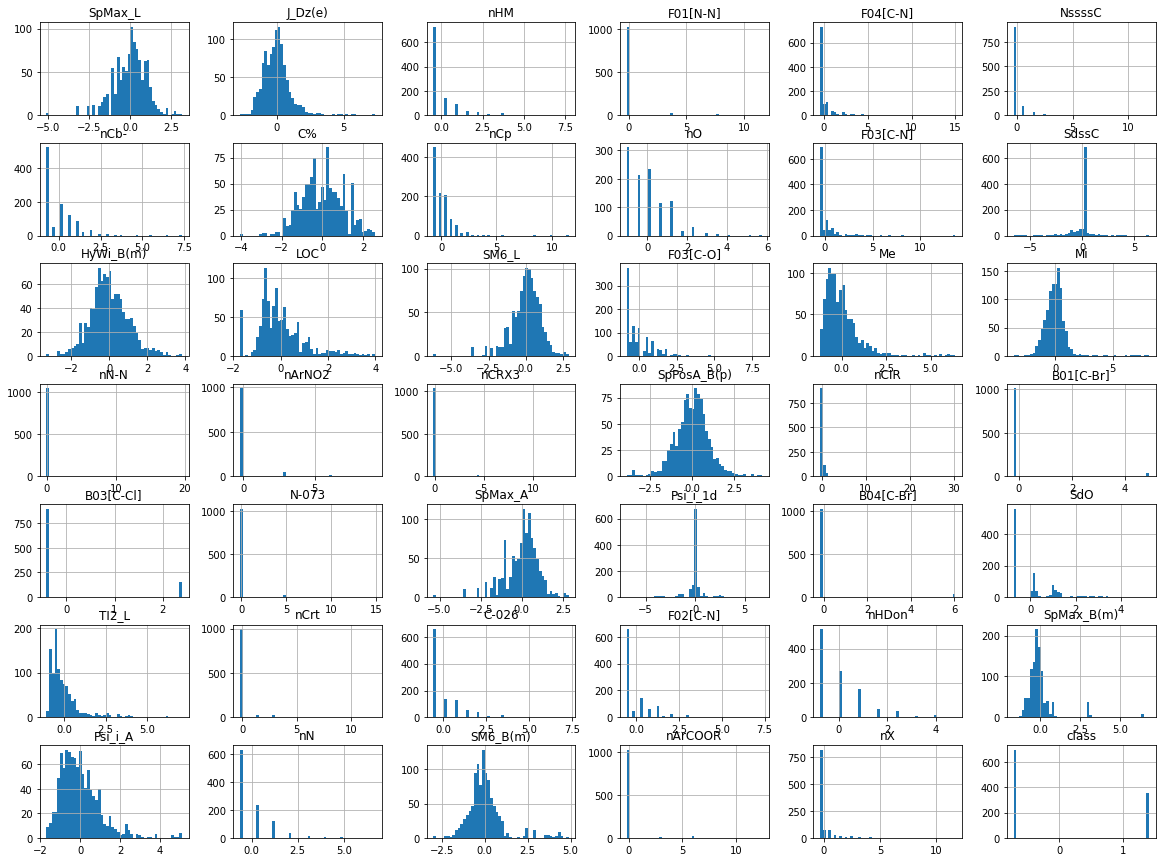

In [23]:
import matplotlib.pyplot as plt
#the code generates a histogram of the data in the df => to visually inspect the distribution of values in different columns of the df
normdf.hist(bins=50,figsize=(20,15))
plt.show()

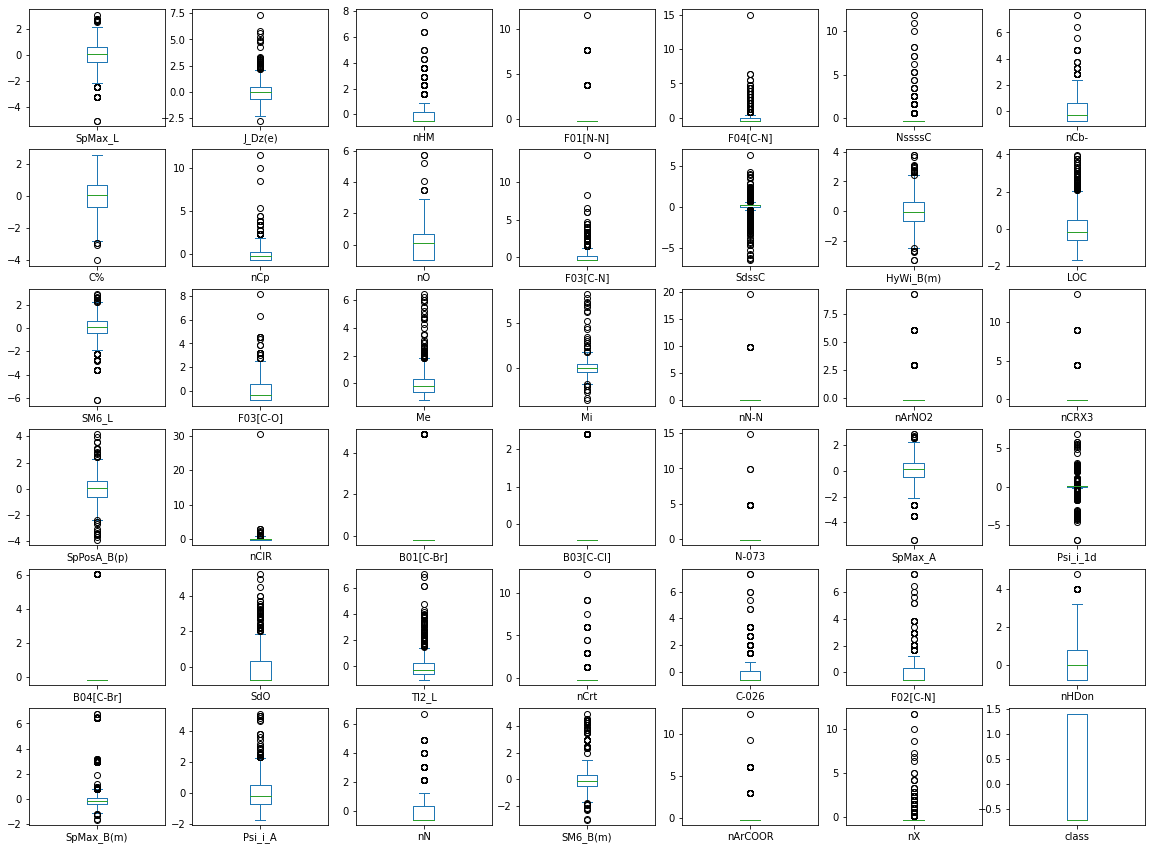

In [25]:
#the code generates a grid of subplots, where each subplot contains a box plot for a specific column in the df 
#This is useful for visualizing the distribution of values, central tendency, and variability in each column, 
#making it easier to identify potential outliers or patterns in the data
normdf.plot(kind='box', subplots=True, layout=(6,7), figsize=(20,15),sharex=False, sharey=False)
plt.show()
#while the prevalence of zero values is common in numerous columns, it doesn't necessarily indicate missing data

### Correlation

In [31]:
df["class"].value_counts(normalize = True)

0    0.662559
1    0.337441
Name: class, dtype: float64

- 0 => NRB (non-degradable) constitutes approximately 66.26% of the entries
- 1 => RB (degradable) constitutes approximately 33.74% of the entries

These percentages provide insights into the class distribution in the "degradable" column of the dataset. In this case, it suggests that the dataset is somewhat imbalanced, with the non-degradable class being more prevalent than the degradable class. Understanding class distribution is important, as imbalances can impact the performance of machine learning models. In this case, the imbalance is quite small, so we decide to keep it.

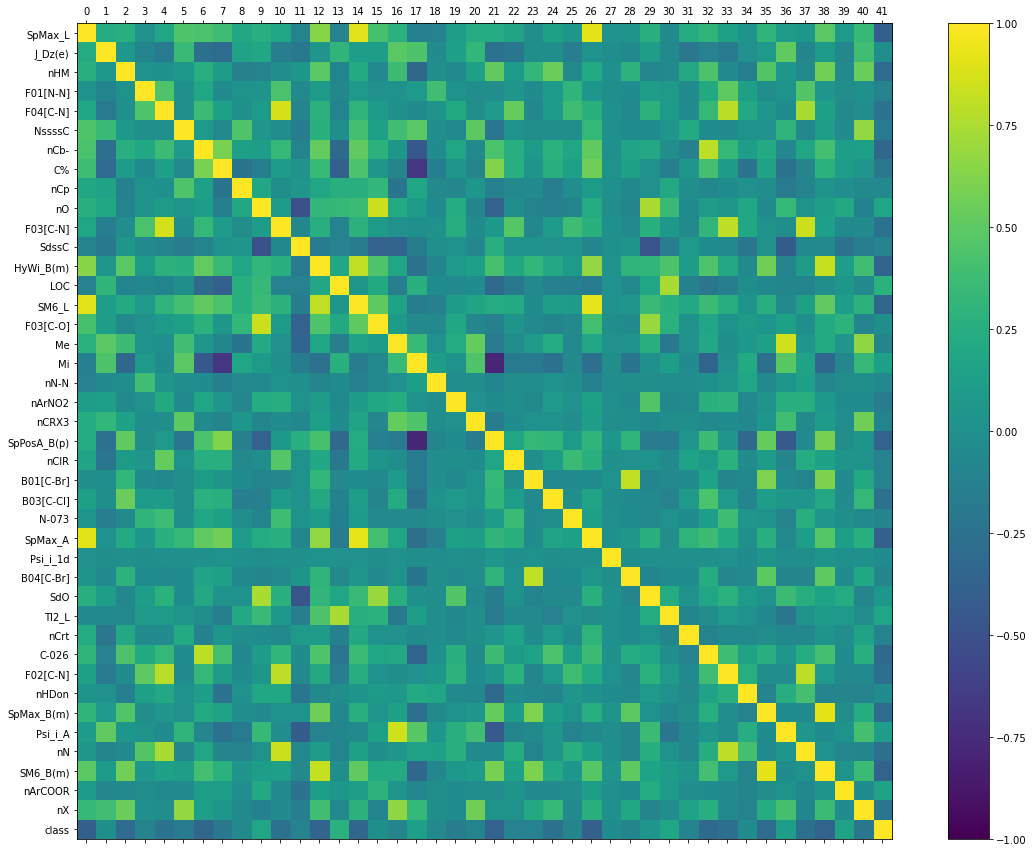

In [29]:
import numpy
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,42,1)
names= df.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
#the code generates a heatmap of the correlation matrix for the columns in the df,
# providing a visual representation of how each column correlates with every other column

In [34]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")
#for each element in the correlation matrix, the function checks if the absolute value of the correlation coefficient is greater than |0.90| 
#if it is, the original value is retained; otherwise, it is replaced with an empty string

#this operation is useful for visualizing or highlighting strong correlations between variables while removing or masking weaker correlations
#it can help focus attention on the most significant relationships in the data

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
SpMax_L,1.0,,,,,,,,,,...,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,...,,,,,,,,,,
nHM,,,1.0,,,,,,,,...,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,...,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,...,,,,,,,,,,
NssssC,,,,,,1.0,,,,,...,,,,,,,,,,
nCb-,,,,,,,1.0,,,,...,,,,,,,,,,
C%,,,,,,,,1.0,,,...,,,,,,,,,,
nCp,,,,,,,,,1.0,,...,,,,,,,,,,
nO,,,,,,,,,,1.0,...,,,,,,,,,,


### Seaborn

Now, the focus will be on assessing the effectiveness of the remaining features in distinguishing between degradable and non-degradable substances. The dataset is divided into the target classes, and each class is individually plotted side by side for every feature. This visualization aims to provide insights into the discriminative power of each feature with respect to the degradability classification.

In [43]:
import seaborn as sns
#only use the features that are not correlated
drop=["SM6_L","SpMax_A","SM6_B(m)"]
keep=list(set(df.columns)-set(drop))
#we divide the data into two categories according to degradability
df_degradable=df.loc[df["class"]==1]
df_nodegradable=df.loc[df["class"]==0]
features=keep #only use the features that are not cocorrelated

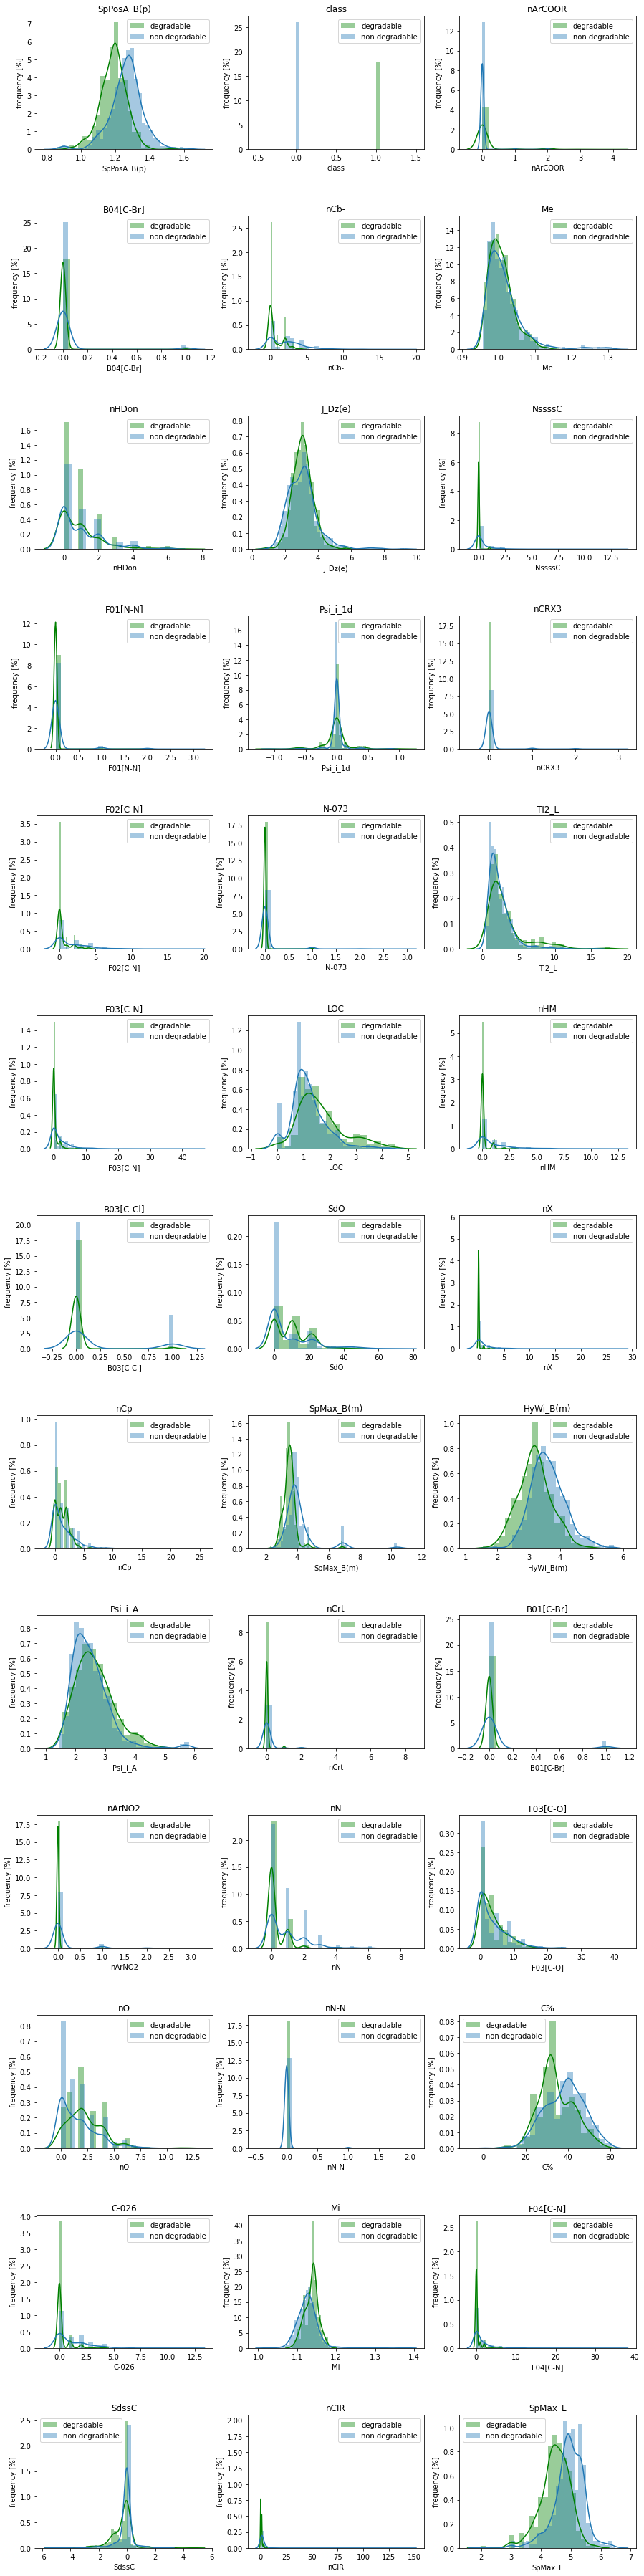

In [44]:
import warnings
warnings.simplefilter('ignore') #ignore warning to imporve readability
import math
num_rows = math.ceil(len(features) / 3)

# Plot the features side by side with three graphics per row using seaborn
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(list(filter(lambda x: x != "diagnosis", features))):
    row_index = i // 3
    col_index = i % 3

    sns.distplot(df_degradable[col], label="degradable", color="g", ax=axes[row_index, col_index], kde=True)
    sns.distplot(df_nodegradable[col], label="non degradable", ax=axes[row_index, col_index], kde=True)
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_ylabel("frequency [%]")
    axes[row_index, col_index].legend()

# Remove empty subplots if the number of features is not a multiple of 3
if len(features) % 3 != 0:
    for i in range(len(features) % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()

The distribution show that the best prediciting features for class seperation are: SpPosA_B(p), HyWi_B(m), C%, SpMax_B(m), SpMax_L
Additionally, the plots highlight that several features exhibit a limited range of distinct values

In [1]:
import random

def generate_random_number(start, end):
    return random.randint(start, end)
print("Hello world")